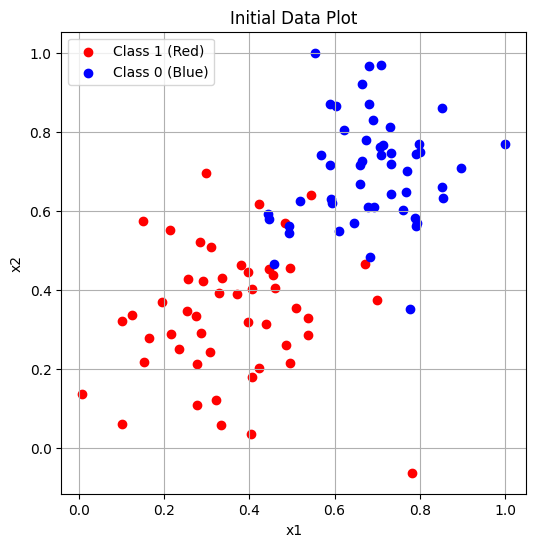

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv", header=None)
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

# Visualization of data
plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1 (Red)')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0 (Blue)')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Initial Data Plot")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
data = pd.read_csv("data.csv", header=None)
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 0    0
1    0
2    0
dtype: int64


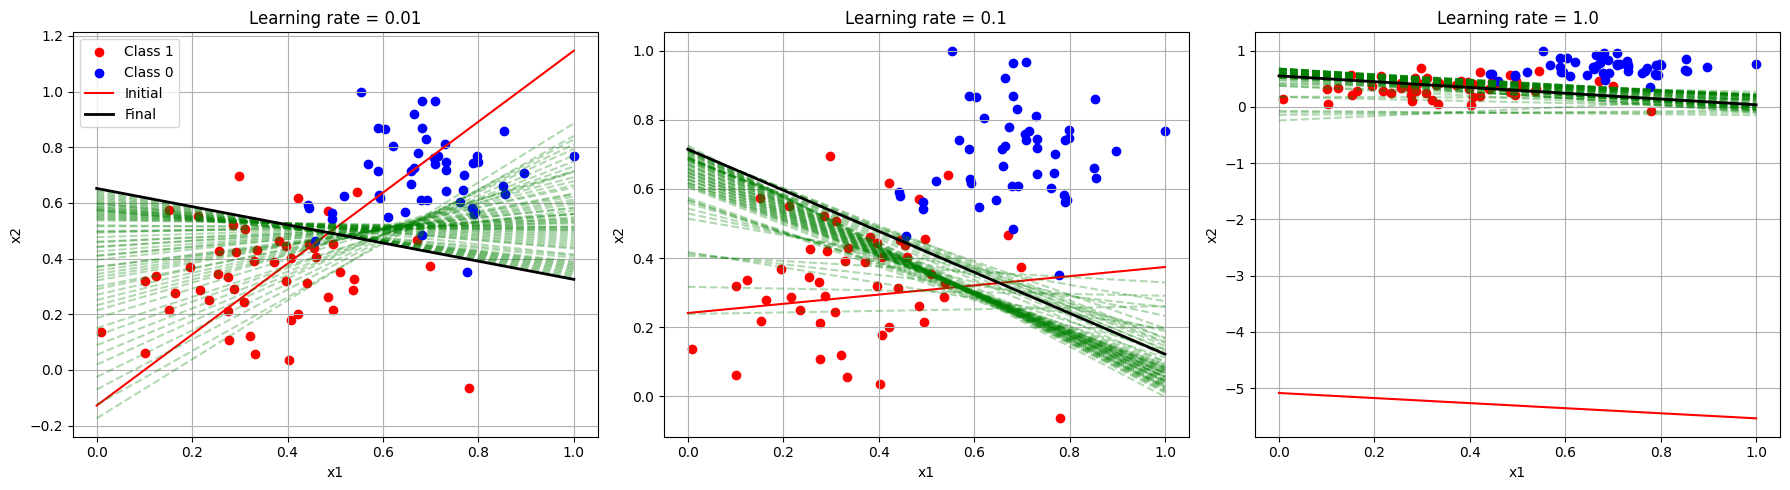

In [7]:
# Heuristic Perceptron function
def heuristic_perceptron(X, y, learning_rate=0.1, max_iter=65):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    bias = np.random.randn()
    boundaries = []

    def predict(x):
        return 1 if np.dot(weights, x) + bias >= 0 else 0

    for _ in range(max_iter):
        for idx, xi in enumerate(X):
            y_pred = predict(xi)
            error = y[idx] - y_pred
            if error == 1:
                weights += learning_rate * xi
                bias += learning_rate
            elif error == -1:
                weights -= learning_rate * xi
                bias -= learning_rate
        boundaries.append((weights.copy(), bias))
    return weights, bias, boundaries


def plot_learning_rate_effects(X, y, learning_rates, max_iter=65):
    plt.figure(figsize=(6 * len(learning_rates), 5))

    for i, lr in enumerate(learning_rates):
        final_w, final_b, boundaries = heuristic_perceptron(X, y, learning_rate=lr, max_iter=max_iter)
        x_vals = np.linspace(0, 1, 100)

        plt.subplot(1, len(learning_rates), i + 1)
        plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label="Class 1")
        plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label="Class 0")

        # Initial
        w, b = boundaries[0]
        y_vals = -(w[0]*x_vals + b)/w[1]
        plt.plot(x_vals, y_vals, 'r-', label="Initial")

        # Intermediate
        for j in range(1, len(boundaries)-1):
            w, b = boundaries[j]
            y_vals = -(w[0]*x_vals + b)/w[1]
            plt.plot(x_vals, y_vals, 'g--', alpha=0.3)

        # Final
        w, b = boundaries[-1]
        y_vals = -(w[0]*x_vals + b)/w[1]
        plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Final")

        plt.title(f"Learning rate = {lr}")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.grid(True)
        if i == 0:
            plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_rate_effects(X, y, learning_rates=[0.01, 0.1, 1.0], max_iter=65)


In the heuristic perceptron model, the learning rate significantly influenced the training behavior. At a low rate of 0.01, the model converged very slowly, taking small steps that eventually formed a reasonable decision boundary, though inefficiently. Increasing the rate to 0.1 yielded the best performance, offering a smooth and stable convergence with a clear final separation between classes — making it an ideal balance for practical applications. However, at a high rate of 1.0, the learning process became unstable, with the decision boundary oscillating and overcorrecting between updates. While the model still converged to a final boundary, the path was erratic, indicating that such aggressive rates are less reliable for consistent training.


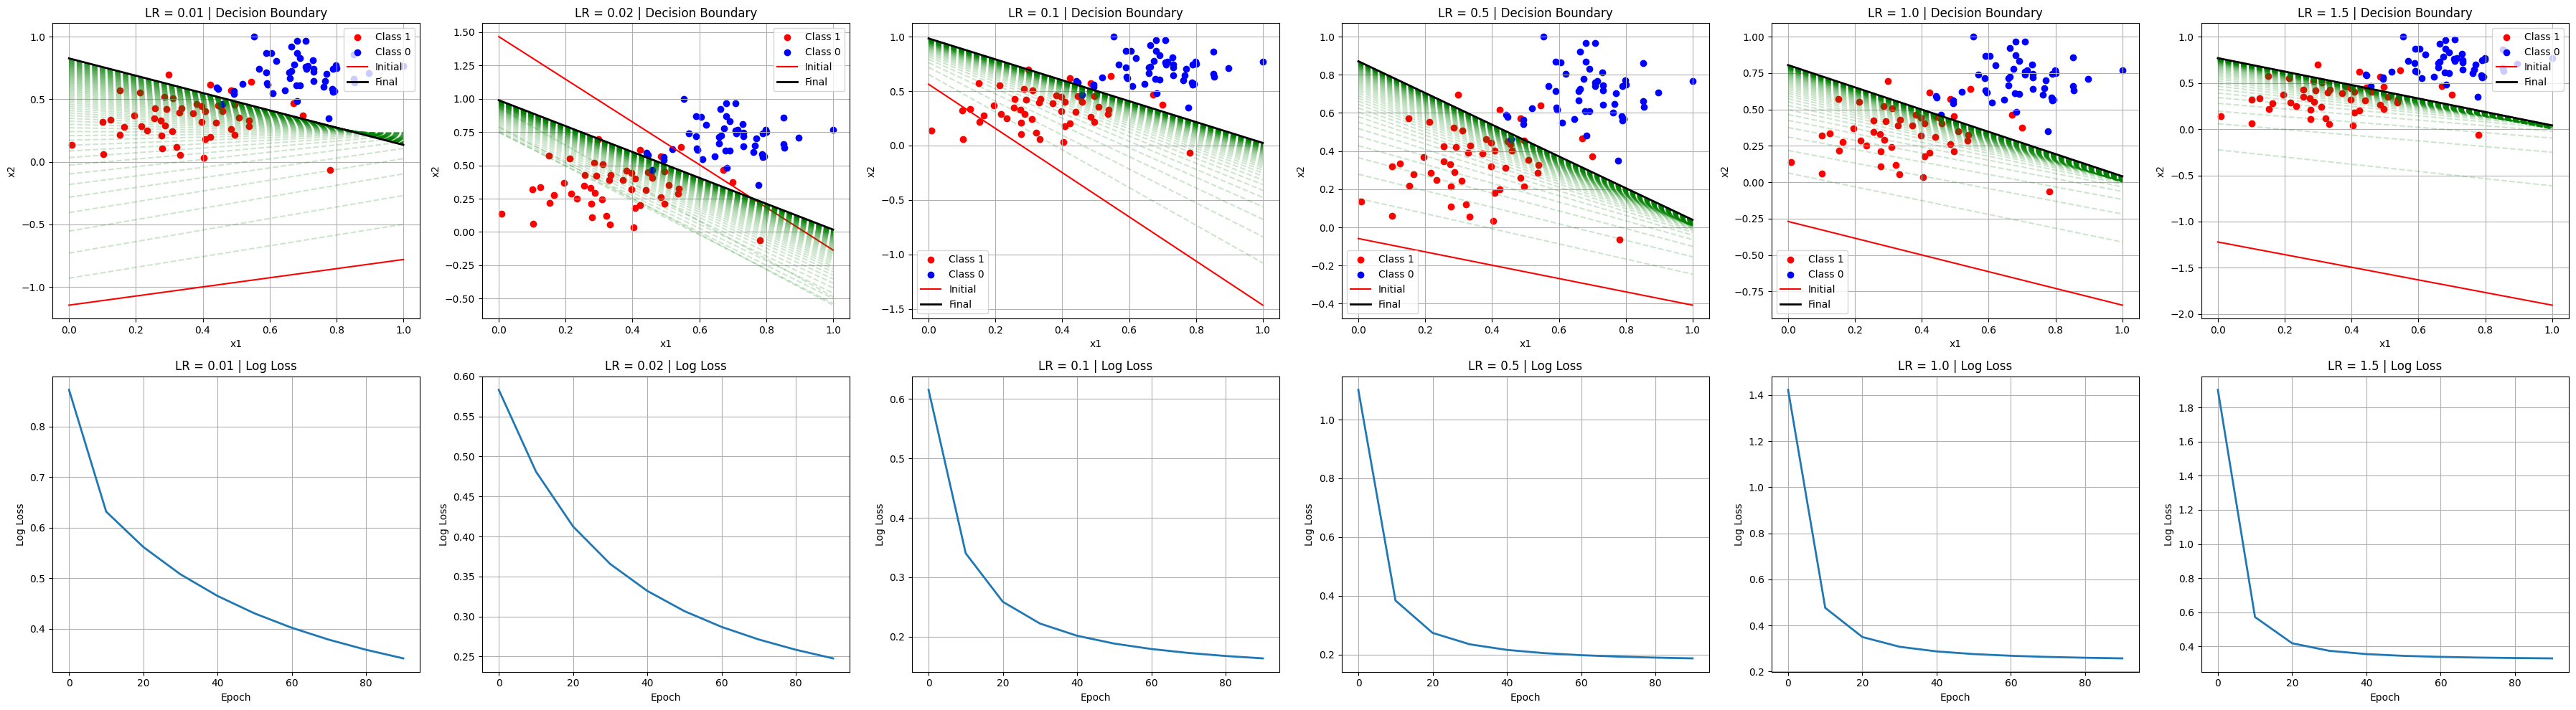

In [14]:

# Sigmoid and Log Loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent Perceptron
def gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100):
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    bias = np.random.randn()
    decision_boundaries = []
    losses = []

    for epoch in range(epochs):
        for idx in range(n_samples):
            xi = X[idx]
            yi = y[idx]
            z = np.dot(weights, xi) + bias
            y_hat = sigmoid(z)
            error = yi - y_hat
            weights += learning_rate * error * xi
            bias += learning_rate * error

        decision_boundaries.append((weights.copy(), bias))
        if epoch % 10 == 0:
            y_preds = sigmoid(np.dot(X, weights) + bias)
            losses.append(log_loss(y, y_preds))

    return weights, bias, decision_boundaries, losses

def run_part2_multiple_rates(X, y, learning_rates=[0.01, 0.1, 1.0], epochs=100):
    fig, axs = plt.subplots(2, len(learning_rates), figsize=(6 * len(learning_rates), 10))

    for i, lr in enumerate(learning_rates):
        final_w, final_b, boundaries, losses = gradient_descent_perceptron(X, y, lr, epochs)
        x_vals = np.linspace(0, 1, 100)

        # Decision boundaries
        axs[0, i].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
        axs[0, i].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')

        # Initial
        w, b = boundaries[0]
        y_vals = -(w[0] * x_vals + b) / w[1]
        axs[0, i].plot(x_vals, y_vals, 'r-', label='Initial')

        # Intermediate
        for j in range(1, len(boundaries)-1):
            w, b = boundaries[j]
            y_vals = -(w[0] * x_vals + b) / w[1]
            axs[0, i].plot(x_vals, y_vals, 'g--', alpha=0.2)


        w, b = boundaries[-1]
        y_vals = -(w[0] * x_vals + b) / w[1]
        axs[0, i].plot(x_vals, y_vals, 'k-', linewidth=2, label='Final')

        axs[0, i].set_title(f"LR = {lr} | Decision Boundary")
        axs[0, i].set_xlabel("x1")
        axs[0, i].set_ylabel("x2")
        axs[0, i].grid(True)
        axs[0, i].legend()

        # Log Loss
        axs[1, i].plot(np.arange(0, epochs, 10), losses, linewidth=2)
        axs[1, i].set_title(f"LR = {lr} | Log Loss")
        axs[1, i].set_xlabel("Epoch")
        axs[1, i].set_ylabel("Log Loss")
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()

# Run for all learning rates
run_part2_multiple_rates(X, y, learning_rates=[0.01,0.02, 0.1,0.5, 1.0,1.5], epochs=100)


# Report

This section investigates how different learning rates impact the performance and convergence of the Gradient Descent-based Perceptron model. The model was trained for 100 epochs on a binary classification task. We evaluated each learning rate using two key visual indicators:

Decision boundary evolution throughout training

Log loss trend (computed every 10 epochs)


We initially defined a default list for clarity, but expanded the actual learning rates during execution to explore a wider range of model behaviors.

 LR = 0.01
The model updated weights in very small increments, resulting in slow but stable convergence. The decision boundary shifted gradually and eventually achieved decent separation of the classes.
The log loss curve exhibited a smooth and consistent decline, indicating steady learning. However, due to the low pace, this configuration may be inefficient for time-sensitive applications.

 LR = 0.02
This learning rate retained the stability of 0.01 while improving convergence speed. The decision boundary adjusted more efficiently, and log loss decreased more rapidly.
This configuration offers a strong balance between caution and progress, and would be a practical choice for most moderate-sized datasets.

 LR = 0.1
This was the most balanced setting. The model converged quickly, producing a clean and accurate final boundary.
The log loss dropped sharply early in training and flattened later, indicating fast learning followed by stabilization.
This rate likely represents the optimal trade-off between speed and reliability for this dataset.

for LR = 0.5, 1.0, 1.5
Across these higher learning rates, the following common trends were observed:

The initial learning was very aggressive, causing large boundary shifts between iterations.

The log loss dropped rapidly, but the final boundary often appeared jagged or overly fitted.

These learning rates resulted in less stable training behavior, with minimal practical gain over LR = 0.1 or 0.02. The visualizations suggest that this group forms a saturation point where increasing the learning rate further does not yield meaningful improvements and may hurt generalization.

# Comparing the models

At learning rate = 0.1, both models perform well. However, the gradient descent model shows slightly smoother progression in boundary updates, due to all points contributing via gradients.
The heuristic model seems to slightly overshoot in some cases but holds well up to LR = 1.0.

For stable and interpretable training, the Gradient Descent Perceptron with LR = 0.1 offers the best balance. It converges quickly, has smooth updates, and supports log loss analysis.

The Heuristic Perceptron is simple, interpretable, and surprisingly robust even at higher learning rates, but it's less flexible for loss-based tuning or extensions

Avoid both models at LR = 1.0 unless additional regularization or early stopping is added — both become unstable beyond that poin